# Historical weather data - Zagreb, Croatia

### Import required packages

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Read CSV data into Pandas dataframe

In [69]:
# Read CSV data into dataframe
data = pd.read_csv("weather_data_zagreb.csv")

# Convert string time to datetime object
data['time'] = pd.to_datetime(data['time'])

# Drop all NaN values
data = data.dropna()

# Print dataframe
data

,time,weathercode (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),sunrise (iso8601),sunset (iso8601),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm)
1,1940-01-02,3.0,-5.2,-11.8,-8.4,-9.6,-16.3,-12.9,1940-01-02T08:37,1940-01-02T17:22,0.0,0.0,0.00,0.0,8.4,20.5,51.0,6.56,0.53
2,1940-01-03,2.0,-4.7,-17.2,-11.5,-9.5,-22.0,-16.2,1940-01-03T08:37,1940-01-03T17:23,0.0,0.0,0.00,0.0,9.7,25.2,225.0,6.15,0.46
3,1940-01-04,71.0,-2.9,-10.7,-6.8,-6.5,-14.9,-10.8,1940-01-04T08:37,1940-01-04T17:24,0.6,0.0,0.42,6.0,7.3,16.6,347.0,2.92,0.28
4,1940-01-05,3.0,-0.0,-3.7,-2.0,-4.5,-7.3,-6.0,1940-01-05T08:37,1940-01-05T17:25,0.0,0.0,0.00,0.0,8.7,21.2,14.0,4.92,0.63
5,1940-01-06,1.0,0.5,-2.6,-1.1,-3.3,-6.4,-5.0,1940-01-06T08:36,1940-01-06T17:26,0.0,0.0,0.00,0.0,8.2,15.1,15.0,5.61,0.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30505,2023-07-09,1.0,29.9,20.6,25.3,33.4,22.0,27.6,2023-07-09T05:15,2023-07-09T20:47,0.0,0.0,0.00,0.0,6.3,16.2,111.0,26.32,5.32
30506,2023-07-10,1.0,33.8,20.4,27.3,36.6,22.5,30.1,2023-07-10T05:16,2023-07-10T20:46,0.0,0.0,0.00,0.0,7.9,17.3,177.0,26.39,5.81
30507,2023-07-11,51.0,33.0,19.9,27.6,37.6,22.6,31.2,2023-07-11T05:17,2023-07-11T20:46,0.1,0.1,0.00,1.0,6.7,17.3,248.0,25.22,5.36
30508,2023-07-12,51.0,34.3,21.0,27.7,36.0,22.6,29.6,2023-07-12T05:18,2023-07-12T20:45,0.1,0.1,0.00,1.0,17.5,41.4,249.0,24.26,6.15


### White Christmas years

#### Years in which there was a snowfall on a Christmas day

In [70]:
# Filter only Christmas dates which include snowfall values larger than zero
white_christmas_years = data[(data["time"].dt.day == 25) & (data["time"].dt.month == 12) & (data["snowfall_sum (cm)"] != 0.0)].reset_index(drop=True)
# Create dataframe copy which contains only two columns
white_christmas_years = white_christmas_years[["time", "snowfall_sum (cm)"]].copy()
# Print dataframe
white_christmas_years

,time,snowfall_sum (cm)
0,1940-12-25,7.56
1,1943-12-25,1.96
2,1959-12-25,0.28
3,1961-12-25,0.35
4,1965-12-25,3.57
5,1969-12-25,0.07
6,1970-12-25,7.14
7,1981-12-25,0.56
8,1982-12-25,3.85
9,1984-12-25,4.48


#### Minimum, maximum and average temperatures on a Christmas day for a period from 1940 to 2022

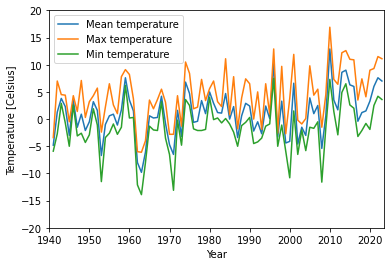

In [71]:
# Filter out Christmas data
christmas_data = data[(data["time"].dt.day == 25) & (data["time"].dt.month == 12)].reset_index(drop=True)

# Plot minimum, maximum and average temperatures on a Christmas day
plt.plot(christmas_data["time"], christmas_data["temperature_2m_mean (°C)"], label="Mean temperature")
plt.plot(christmas_data["time"], christmas_data["temperature_2m_max (°C)"], label="Max temperature")
plt.plot(christmas_data["time"], christmas_data["temperature_2m_min (°C)"], label="Min temperature")

plt.xlabel("Year")
plt.ylabel("Temperature [Celsius]")

plt.xlim([dt.date(1940, 1, 1), dt.date(2023, 7, 13)])
plt.ylim(-20, 20)

plt.legend()

#### Years with snowfall during the period of 10 days before Christmas

In [72]:
# Filter out all the years with the snowfall in the period from December 15th to December 25th
snowfall_before_christmas_years = data[(data["time"].dt.day >= 15) & (data["time"].dt.day <= 25) & (data["time"].dt.month == 12) & (data["snowfall_sum (cm)"] != 0.0)].reset_index(drop=True)
# Create three-column dataframe
snowfall_before_christmas_years = snowfall_before_christmas_years[["time", "temperature_2m_mean (°C)", "snowfall_sum (cm)"]].copy()
# Print dataframe
snowfall_before_christmas_years

,time,temperature_2m_mean (°C),snowfall_sum (cm)
0,1940-12-22,-13.4,0.98
1,1940-12-23,-8.2,2.87
2,1940-12-24,-7.5,7.49
3,1940-12-25,-4.8,7.56
4,1941-12-18,2.4,7.84
...,...,...,...
178,2017-12-18,-0.4,0.07
179,2017-12-21,1.1,0.07
180,2018-12-15,-0.1,1.40
181,2020-12-25,6.0,0.28


## Heatwaves